In [1]:
# import all the required packages and modules
%matplotlib inline
%config InlineBackend.figure_format = 'svg' 
from matplotlib import pyplot as plt
import numpy as np
import pickle
import sys
sys.path.append('/Users/bpb/Data/programming/MetaboliteAtlas/github/metatlas/')
import metatlas




In [2]:
metatlas_data = pickle.load( open( "caj_data_practice_metatas_isotopes.pkl", "rb" ) )
for key in metatlas_data:
   globals()[key]=metatlas_data[key]

In [3]:
dataMat = np.zeros((len(data),7,len(export_fileIds)))
for i,datum in enumerate(data):
    rtMin = float(dictData[u'compounds'][i][u'rt_min'])
    rtMax = float(dictData[u'compounds'][i][u'rt_max'])
    for j,myFile in enumerate(export_fileIds):
        for k in range(7):
            if datum[k].size>3:
                idx = np.logical_and( datum[k][:,2]==myFile, datum[k][:,0]>=rtMin, datum[k][:,0]<=rtMax )
                if np.sum(idx)>0:
                    x1 = datum[k][:,0][idx]
                    y1 = datum[k][:,1][idx]
                    y1 = y1 - np.min(y1)
    #                 y1 = y1[:] / fileInfo['normalization_factor'][j]
                    dataMat[i,k,j] = np.max(y1)

In [4]:
print dataMat

[[[  704.4977   427.0823]
  [  429.043    590.257 ]
  [  119.       642.111 ]
  [   82.       454.256 ]
  [   42.       210.522 ]
  [   63.1642    99.    ]
  [   69.       148.541 ]]

 [[ 3515.77     361.285 ]
  [ 1120.19    1165.6622]
  [   91.666    946.2073]
  [   32.0049   137.903 ]
  [   62.       578.698 ]
  [  100.       298.647 ]
  [   47.       224.071 ]]

 [[ 9747.66    6384.29  ]
  [  241.138   3854.28  ]
  [  344.583    521.153 ]
  [ 1214.0912   327.2313]
  [  407.698    280.939 ]
  [   66.      1453.34  ]
  [   98.475    472.656 ]]

 [[  872.0216   345.7637]
  [  520.787    391.921 ]
  [  244.571    201.008 ]
  [   76.       293.2278]
  [   30.       269.153 ]
  [  117.126    318.489 ]
  [  117.671    117.747 ]]

 [[  891.415    868.9315]
  [  454.185    711.507 ]
  [  412.539   1043.8801]
  [  446.405    227.    ]
  [  185.6188   444.861 ]
  [   36.      1533.62  ]
  [   54.7068  1073.44  ]]]


In [7]:
myFormula = dictData['compounds'][0]['formula']
f = metatlas.chemformula_struct(myFormula)
print f
m = metatlas.monoisotopicmass(myFormula)
print m
fList = metatlas.chemformula_list(myFormula)
print fList
mass,magnitude,monoisotopic = metatlas.isotope(fList,0)
print mass
print magnitude
print monoisotopic

[(u'C', u'35'), (u'H', u'70'), (u'N', u''), (u'O', u'8'), (u'P', u'')]
618.507069224
[ 70.  35.   0.   8.   0.   0.   0.   0.]
[ 618.50746   619.510815  620.51417   621.517525  622.52088   623.524235]
[  6.56439605e-01   2.67238160e-01   6.34737464e-02   1.10839116e-02
   1.55839619e-03   1.85136431e-04]
618.50746


In [13]:
# myFormulae = ['C33H63O4','C34H63O4','C34H65O4','C37H67O4','C37H69O4']
myFormulae = []
for c in dictData['compounds']:
    myFormulae.append(c['formula'])
fList = []
nList = []
mList = []
for formula in myFormulae:
    temp = metatlas.chemformula_list(formula)
    mList.append(metatlas.monoisotopicmass(formula))

    fList.append(list(temp))
    nList.append(20)
print list(fList)
print nList
print mList

[[70.0, 35.0, 0.0, 8.0, 0.0, 0.0, 0.0, 0.0], [70.0, 37.0, 0.0, 8.0, 0.0, 0.0, 0.0, 0.0], [72.0, 37.0, 0.0, 8.0, 0.0, 0.0, 0.0, 0.0], [74.0, 37.0, 0.0, 8.0, 0.0, 0.0, 0.0, 0.0], [74.0, 39.0, 0.0, 8.0, 0.0, 0.0, 0.0, 0.0]]
[20, 20, 20, 20, 20]
[618.50706922380004, 642.50706922379993, 644.52271928799996, 646.53836935219999, 670.53836935219999]


(10, 28)
[ 618.595  619.6    620.605  621.61   622.61   623.615  624.62   625.62
  642.595  643.6    644.605  645.61   646.61   647.615  648.62   649.62
  650.635  651.635  652.65   653.65   670.63   671.63   672.635  673.64
  674.64   675.645  676.65   677.65 ]


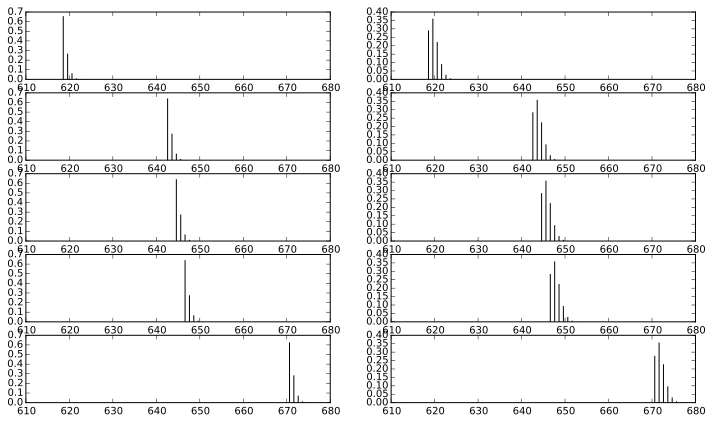

In [14]:
mzvec,isoY = metatlas.isotopic_pattern(fList, 0.04, nList)
print isoY.shape
mzvec = mzvec + 0.09
print mzvec


plt.figure(num=None, figsize=(12, 7), dpi=80, facecolor='w', edgecolor='k')
for i in range(isoY.shape[0]):
    plt.subplot(5,2,i+1).vlines(mzvec,0,isoY[i,:])
#     plt.subplot(1,2,2).vlines(mzvec,0,isoY[1])
plt.show()

[ 0.00662665  1.03124157]
[  2.92385722e-10   9.28997163e-01]
[  4.01425796e-10   9.36074659e-01]
[ 0.009662    1.06740721]
[ 0.03453419  1.08694329]
[ 0.07132443  1.00614768]
[ 0.05923926  0.91816663]
[ 0.00645658  0.94871207]
[ 0.04006927  0.94160802]
[ 0.09802383  0.64009399]


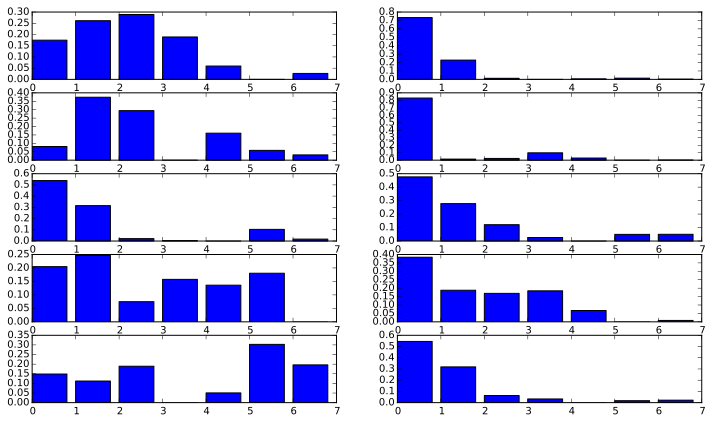

In [71]:
# estimate d-abund
# inputs
#     list of chemical formula vectors for m molecules
#     list of measured intensity vectors for m molecules and i isotopologues
#     list of number hydrogens that would be labeled for m molecules
from scipy.optimize import leastsq
# fList
# nList


def errfunc(p,formula,dataset,n):
    mzvec,isoY = metatlas.isotopic_pattern([formula], p[0], [n])
    # isoY[0] is unlabeled
    # isoY[1] is labeled
    #pad zeros onto isoY if too short
    if len(isoY[1])<7:
        y = np.concatenate( ( np.asarray(isoY[1]),np.zeros(7-len(isoY[1])) ) ,axis=1)
    else:
        y = np.asarray(isoY[1][:7])
    
    if (p[0] < 0 ) or (p[1] < 0):
        return 1e100
    else:
        return ( y - p[1]*np.asarray(dataset) )**2


i0 = [0.02, 1]
plt.figure(num=None, figsize=(12, 7), dpi=80, facecolor='w', edgecolor='k')
# for i in range(isoY.shape[0]):
for j in range(2):
    dList = []
    for d in dataMat:
        temp = d[:,j] # make this zero for unlabeled (first file) or one for labeled (second file)
        temp = temp - min(temp[:])
        temp = temp / sum(temp)
        dList.append(temp.tolist())
    for i in range(len(fList)):
        out = leastsq(errfunc, i0, args=(fList[i],dList[i],20) )
        print out[0]
        plt.subplot(5,2,i*2 + j).bar(range(len(dList[i])),dList[i])


# def fitACompound(fvec,n,dvec):
#     init  = [1.0, rtPeak, 0.1,0.1]
#     out   = leastsq( errfunc, init, args=(data['xdata'], data['ydata'], rtPeak, rtMin, rtMax))
#     fitResult = out[0]
#     fitResult[2] = abs(fitResult[2])
#     fitResult[3] = abs(fitResult[3])
#     return fitResult


#     if (abs(p[2]) > 1.5) or (abs(p[3]) > 1.5) or (abs(p[2]) < 0.001) or (abs(p[3]) < 0.001) or (p[1] > rtMax) or (p[1] < rtMin):
#         return 1e100
#     else:
#         # return (y-fitfunc(p,x))**2
#         # idx = x > rtMin and x < rtMax
#         return np.multiply((y-fitfunc(p,x))**2,np.exp(-0.5*((x-rtPeak)/0.075)**2))
plt.show()

In [42]:
print np.zeros((7))

[ 0.  0.  0.  0.  0.  0.  0.]


In [63]:
print range(2)

[0, 1]
